In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')

In [4]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.00,-3.97,-2.51,5.35,-1.01,1.84,0.33,-0.491590483,good
1,1.00,-1.20,-2.84,3.66,1.59,0.85,0.87,-0.722809367,good
2,2.00,-0.29,-1.35,-1.74,-0.34,2.84,-0.04,2.621636473,bad
3,3.00,-0.66,-2.27,1.32,-0.10,3.64,-3.41,0.790723217,good
4,4.00,1.36,-1.30,-0.38,-0.55,3.03,-1.30,0.501984036,good


In [5]:
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [11]:
# Object olan typeları float ve integer e dönüştüreceğiz.
# We will convert object types to float and integer.

df['Acidity'] = df['Acidity'].astype(float)

# good olan yer True yani '1' konur. 'bad' olan ise False olur böylelikle '0' olur.
# where 'good' is True, so '1' is put. where 'bad' is False, so '0' is put.
df['Quality'] = (df['Quality'] == 'good').astype(int) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 312.5 KB


In [13]:
df['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.00,1999.50,1154.84,0.00,999.75,1999.50,2999.25,3999.00
Size,4000.00,-0.50,1.93,-7.15,-1.82,-0.51,0.81,6.41
Weight,4000.00,-0.99,1.60,-7.15,-2.01,-0.98,0.03,5.79
Sweetness,4000.00,-0.47,1.94,-6.89,-1.74,-0.50,0.80,6.37
Crunchiness,4000.00,0.99,1.40,-6.06,0.06,1.00,1.89,7.62
Juiciness,4000.00,0.51,1.93,-5.96,-0.80,0.53,1.84,7.36
Ripeness,4000.00,0.50,1.87,-5.86,-0.77,0.50,1.77,7.24
Acidity,4000.00,0.08,2.11,-7.01,-1.38,0.02,1.51,7.40
Quality,4000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00


In [15]:
df.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality'], dtype='object')

In [16]:
df.drop(columns=['A_id'], inplace=True)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.00,-0.50,1.93,-7.15,-1.82,-0.51,0.81,6.41
Weight,4000.00,-0.99,1.60,-7.15,-2.01,-0.98,0.03,5.79
Sweetness,4000.00,-0.47,1.94,-6.89,-1.74,-0.50,0.80,6.37
Crunchiness,4000.00,0.99,1.40,-6.06,0.06,1.00,1.89,7.62
Juiciness,4000.00,0.51,1.93,-5.96,-0.80,0.53,1.84,7.36
Ripeness,4000.00,0.50,1.87,-5.86,-0.77,0.50,1.77,7.24
Acidity,4000.00,0.08,2.11,-7.01,-1.38,0.02,1.51,7.40
Quality,4000.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00


In [18]:
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.97,-2.51,5.35,-1.01,1.84,0.33,-0.49,1
1,-1.20,-2.84,3.66,1.59,0.85,0.87,-0.72,1
2,-0.29,-1.35,-1.74,-0.34,2.84,-0.04,2.62,0
3,-0.66,-2.27,1.32,-0.10,3.64,-3.41,0.79,1
4,1.36,-1.30,-0.38,-0.55,3.03,-1.30,0.50,1


In [19]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [20]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.97,-2.51,5.35,-1.01,1.84,0.33,-0.49
1,-1.20,-2.84,3.66,1.59,0.85,0.87,-0.72
2,-0.29,-1.35,-1.74,-0.34,2.84,-0.04,2.62
3,-0.66,-2.27,1.32,-0.10,3.64,-3.41,0.79
4,1.36,-1.30,-0.38,-0.55,3.03,-1.30,0.50


In [21]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Quality, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [23]:
scaler =StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-2.01091793e-01,  2.41010956e-01, -9.74332380e-01, ...,
        -1.79591919e+00,  1.03067388e-01, -5.96309539e-01],
       [ 1.01981989e+00, -1.11378265e+00,  7.54272181e-01, ...,
        -1.02177297e+00,  1.67000615e+00,  1.44528307e-01],
       [ 2.42888105e-01,  1.06430450e+00,  3.36279108e-01, ...,
         2.13711382e-01, -1.17298122e-01, -9.83461585e-01],
       ...,
       [-1.10115536e+00, -9.82718065e-01,  2.80466907e-01, ...,
         2.58269985e+00,  4.98286506e-01,  2.69265941e+00],
       [ 2.76381379e-01,  2.57856925e-01,  7.72974701e-01, ...,
         1.67794847e+00, -2.61769902e+00,  1.26704752e+00],
       [-1.30239783e+00,  3.39549077e-01,  1.11493916e+00, ...,
         5.74202850e-01, -5.66379316e-01, -2.95169627e-04]])

### Linear Regression

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [26]:
lr.coef_

array([[ 1.23675913,  0.39656341,  1.1015446 ,  0.06402714,  0.84993083,
        -0.23350877, -0.55664892]])

In [27]:
lr.intercept_

array([0.00452371])

In [28]:
y_pred = lr.predict(X_test)

In [29]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       422
           1       0.72      0.77      0.75       378

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.76      0.75      0.75       800



In [30]:
cm = metrics.confusion_matrix(y_test,y_pred, labels = lr.classes_)

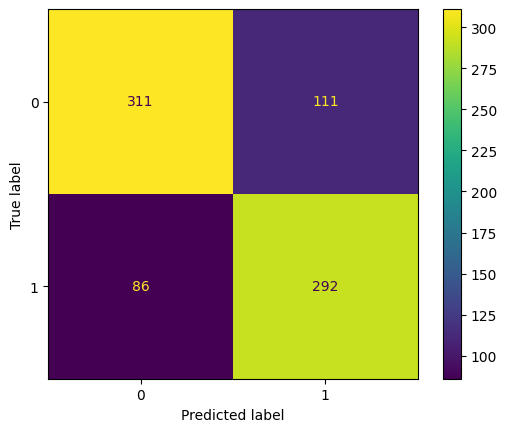

In [31]:
display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = lr.classes_)
display.plot();